In [139]:
require(vcd)
require(Hmisc)
require(ca)
require(ggplot2)
require(dplyr)
require(viridis)
require(FactoMineR)
require(readr)
require(rms)
require(arm)

In [22]:
data <- read_csv("data.csv")
str(data)

Parsed with column specification:
cols(
  .default = col_character(),
  attraction = col_logical(),
  v1_index = col_double(),
  x_index = col_double(),
  y_index = col_double(),
  v2_index = col_double(),
  distance_v1v2 = col_double(),
  distance_xy = col_double(),
  distance_yv2 = col_double(),
  personal = col_logical(),
  poss_verb = col_logical(),
  copula = col_logical(),
  second_attraction = col_logical(),
  third_attraction = col_logical(),
  y_adj = col_logical(),
  y_part = col_logical(),
  sg_pl = col_logical()
)

See spec(...) for full column specifications.

Warning message:
“1 parsing failure.
row col   expected     actual       file
118  -- 36 columns 37 columns 'data.csv'
”


tibble [122 × 36] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ passage          : chr [1:122] "ἀφῆκέ μοι ἐλθόντι πρὸς ὑμᾶς λέγειν τἀληθῆ" "τουτέων ἀδελφεῶν ἐουσέων δοκέω ἡμῖν Αἰγινητέων δέεσθαι τὸν θεὸν χρῆσαι τιμωρητήρων γενέσθαι." "Ἐρετριέες δὲ πυνθανόμενοι τὴν στρατιὴν τὴν Περσικὴν ἐπὶ σφέας ἐπιπλέουσαν Ἀθηναίων ἐδεήθησαν σφίσι βοηθοὺς γενέσθαι." "ἐνταῦθα δὴ κατά τε τοῦ Τισσαφέρνους ἔλεγον ἃ πεποιηκὼς εἴη, αὐτοῦ τε Κύρου ἐδέοντο ὡς προθυμοτάτου πρὸς τὸν πόλεμον γενέσθαι." ...
 $ author           : chr [1:122] "Xenophon" "Herodotus" "Herodotus" "Xenophon" ...
 $ text             : chr [1:122] "Hellenica" "Historiae" "Historiae" "Hellenica" ...
 $ local            : chr [1:122] "6 1 13" "5 80" "6 100" "1 5 2" ...
 $ attraction       : logi [1:122] TRUE TRUE FALSE TRUE FALSE FALSE ...
 $ v1               : chr [1:122] "ἀφῆκέ" "δέεσθαι" "ἐδεήθησαν" "ἐδέοντο" ...
 $ x                : chr [1:122] "μοι" "Αἰγινητέων" "Ἀθηναίων" "Κύρου" ...
 $ y                : chr [1:122] "ἐλθόντι" "τιμωρητ

In [23]:
head(data)
attach(data)

passage,author,text,local,attraction,v1,x,y,y2,y3,⋯,y2_analysis,y3_analysis,y_POS,y_number,y_adjectival,y_adj,y_part,dialect,dialogue,sg_pl
<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<chr>,<lgl>
ἀφῆκέ μοι ἐλθόντι πρὸς ὑμᾶς λέγειν τἀληθῆ,Xenophon,Hellenica,6 1 13,TRUE,ἀφῆκέ,μοι,ἐλθόντι,NA,NA,⋯,NA,NA,part,sg,TRUE,FALSE,TRUE,attic,FALSE,FALSE
τουτέων ἀδελφεῶν ἐουσέων δοκέω ἡμῖν Αἰγινητέων δέεσθαι τὸν θεὸν χρῆσαι τιμωρητήρων γενέσθαι.,Herodotus,Historiae,5 80,TRUE,δέεσθαι,Αἰγινητέων,τιμωρητήρων,NA,NA,⋯,NA,NA,noun,pl,FALSE,FALSE,FALSE,jonic,FALSE,FALSE
Ἐρετριέες δὲ πυνθανόμενοι τὴν στρατιὴν τὴν Περσικὴν ἐπὶ σφέας ἐπιπλέουσαν Ἀθηναίων ἐδεήθησαν σφίσι βοηθοὺς γενέσθαι.,Herodotus,Historiae,6 100,FALSE,ἐδεήθησαν,Ἀθηναίων,βοηθοὺς,NA,NA,⋯,NA,NA,noun,pl,FALSE,FALSE,FALSE,jonic,FALSE,FALSE
"ἐνταῦθα δὴ κατά τε τοῦ Τισσαφέρνους ἔλεγον ἃ πεποιηκὼς εἴη, αὐτοῦ τε Κύρου ἐδέοντο ὡς προθυμοτάτου πρὸς τὸν πόλεμον γενέσθαι.",Xenophon,Hellenica,1 5 2,TRUE,ἐδέοντο,Κύρου,προθυμοτάτου,NA,NA,⋯,NA,NA,adj,sg,TRUE,TRUE,FALSE,attic,FALSE,FALSE
"δέονται δέ σου καὶ τοῦτο, παραγενόμενον καὶ ἄρξαντα ἑαυτῶν πεῖραν λαβεῖν καὶ Δεξίππου καὶ σφῶν τῶν ἄλλων οἷος ἕκαστός ἐστι, καὶ τὴν ἀξίαν ἑκάστοις νεῖμαι.",Xenophon,Anabasis,6 6 33,FALSE,δέονται,σου,παραγενόμενον,ἄρξαντα,NA,⋯,aor part act masc acc sg,NA,part,sg,TRUE,FALSE,TRUE,attic,FALSE,FALSE
"ἔπεμπε δὲ καὶ πρὸς Κῦρον, δεόμενος αὐτοῦ πειρᾶσθαι ἄρχοντα ἐλθεῖν τῶν ἀνδρῶν, εἴ τινας πέμποι στρατιώτας τὸ Περσῶν κοινόν.",Xenophon,Cyropaedia,1 5 4,FALSE,δεόμενος,αὐτοῦ,ἄρχοντα,NA,NA,⋯,NA,NA,part,sg,TRUE,FALSE,TRUE,attic,FALSE,FALSE


The following objects are masked from data (pos = 3):

    attraction, author, copula, dialect, dialogue, distance_v1v2,
    distance_xy, distance_yv2, local, passage, personal, poss_verb,
    second_attraction, sg_pl, text, third_attraction, v1, v1_analysis,
    v1_index, v1_lemma, v2, v2_index, x, x_index, y, y_adj,
    y_adjectival, y_analysis, y_index, y_number, y_part, y_POS, y2,
    y2_analysis, y3, y3_analysis


The following object is masked from package:ca:

    author




In [25]:
addmargins(table(v1_lemma, author))

,Herodotus,Plato,Xenophon,Sum
ἀφίημι,0,0,1,1
δέομαι,2,0,4,6
δίδωμι,0,0,1,1
δοκεῖ,18,9,12,39
ἐγχωρεῖ,0,2,0,2
ἐντέλλομαι,7,0,0,7
ἐξαρκεῖ,0,2,1,3
ἔξεστι,0,3,20,23
ἐπισκήπτω,1,0,0,1
παραγγέλλω,3,0,9,12


In [182]:
(addmargins(table(attraction)))

attraction
FALSE  TRUE   Sum 
   83    39   122 

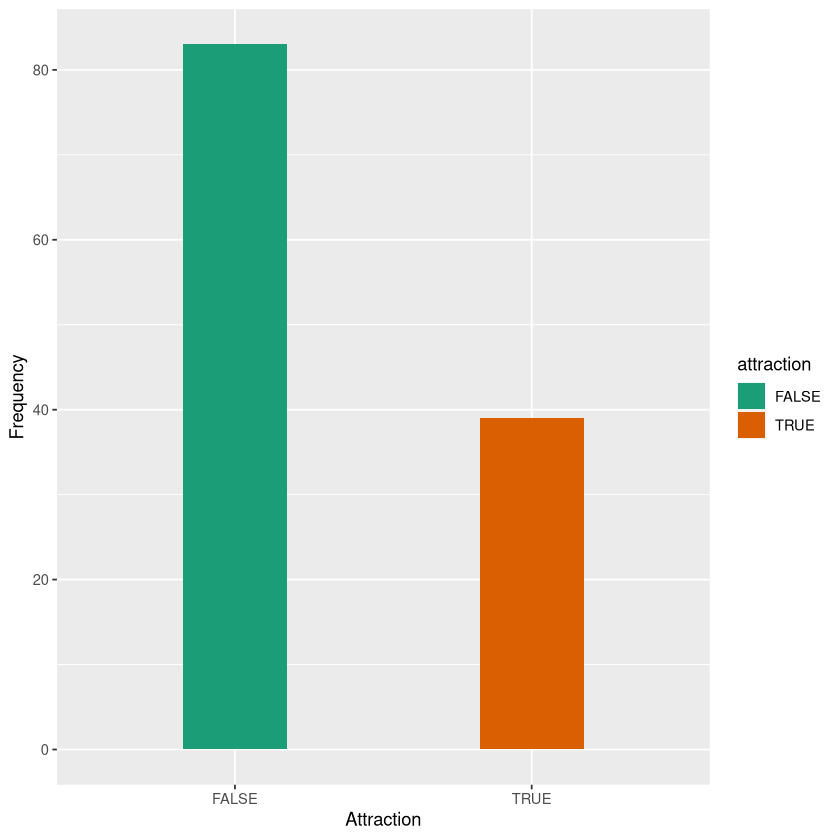

In [181]:
p<-ggplot(data, aes(x=factor(attraction), fill=attraction)) +
    geom_bar(stat="count", width = 0.35) + 
    labs(x = "Attraction", y="Frequency") +
    theme_get()
p+scale_fill_brewer(palette="Dark2")

,FALSE,TRUE,Sum
FALSE,75,23,98
TRUE,8,16,24
Sum,83,39,122


                    X^2 df   P(> X^2)
Likelihood Ratio 15.545  1 8.0546e-05
Pearson          16.541  1 4.7604e-05

Phi-Coefficient   : 0.368 
Contingency Coeff.: 0.346 
Cramer's V        : 0.368 

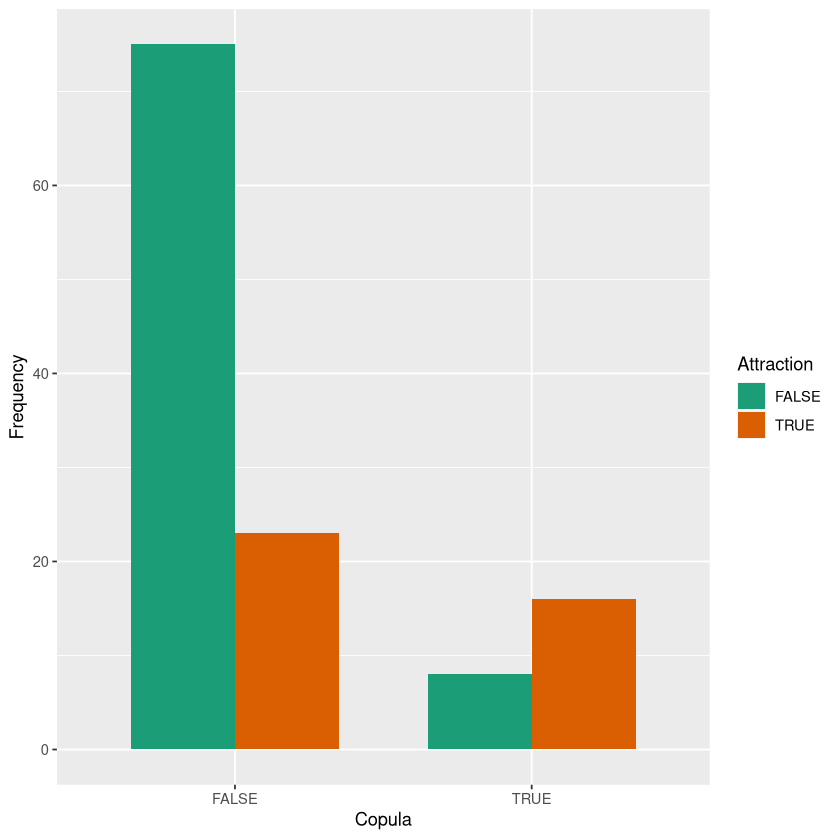

In [186]:
addmargins(table(copula, attraction))
assocstats(table(copula, attraction))
p <- ggplot(data=group_by(data,copula), aes(x=factor(copula), fill=attraction)) +
    geom_bar(stat="count", position=position_dodge(), width = .7) + 
    labs(x = "Copula", y="Frequency", fill="Attraction") +
    theme_get() + scale_fill_brewer(palette="Dark2")
p

notch went outside hinges. Try setting notch=FALSE.



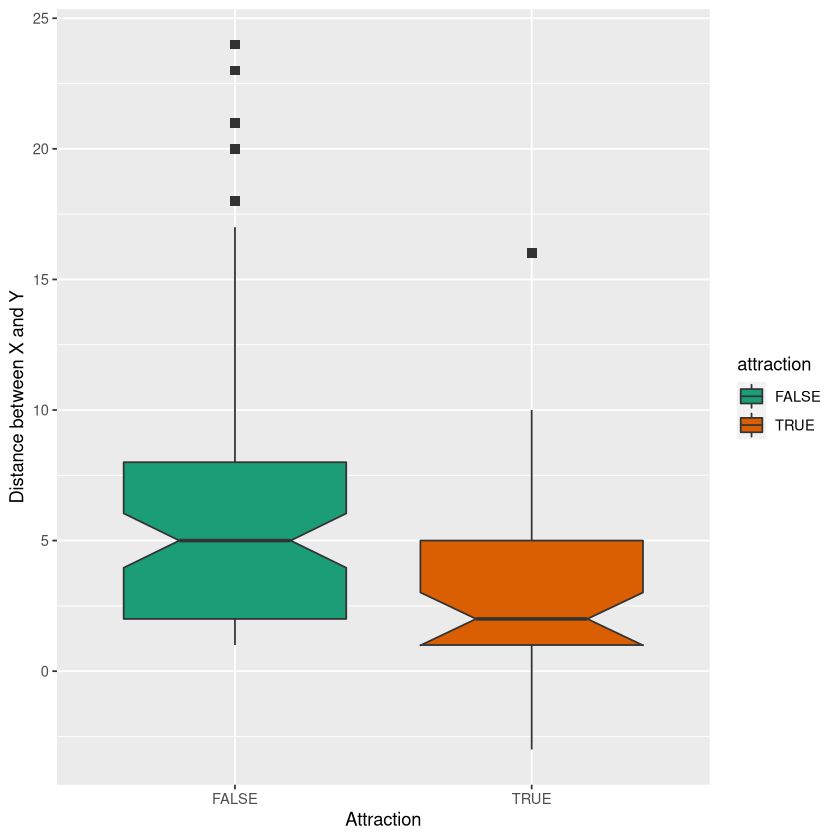

In [177]:
p <- ggplot(data, aes(attraction, distance_xy, fill=attraction)) +
    geom_boxplot(notch=T, outlier.shape=15,
             outlier.size=2.4) +
    labs(x="Attraction", y="Distance between X and Y") +
    theme_get() + scale_fill_brewer(palette="Dark2")
p

In [278]:
mca <- MCA(data[,c("attraction", "copula", "poss_verb", "personal", "author")], method = "Burt")

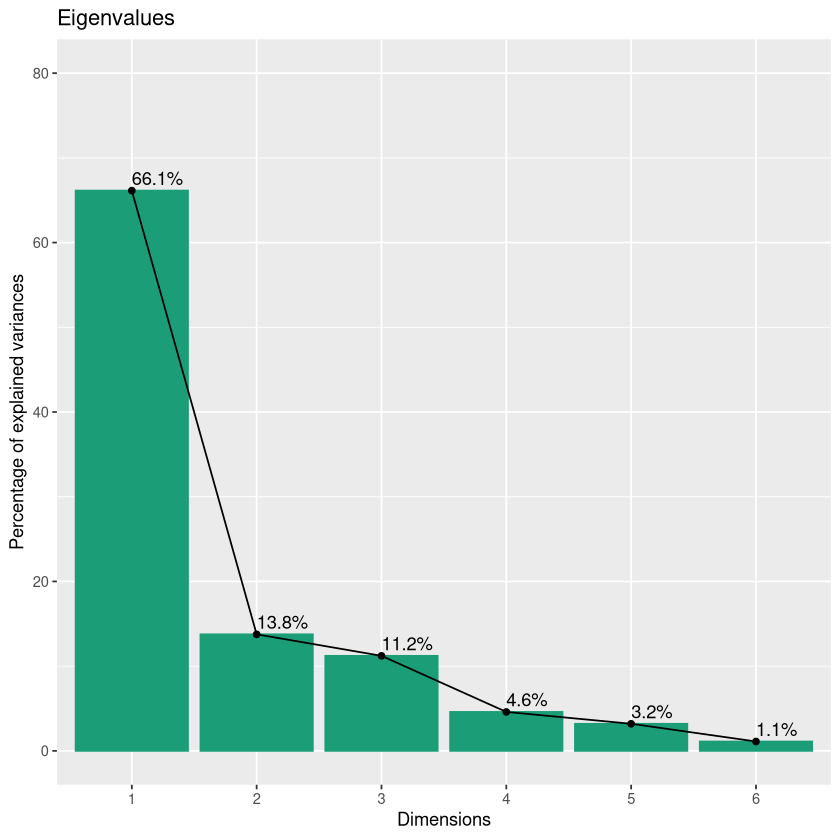

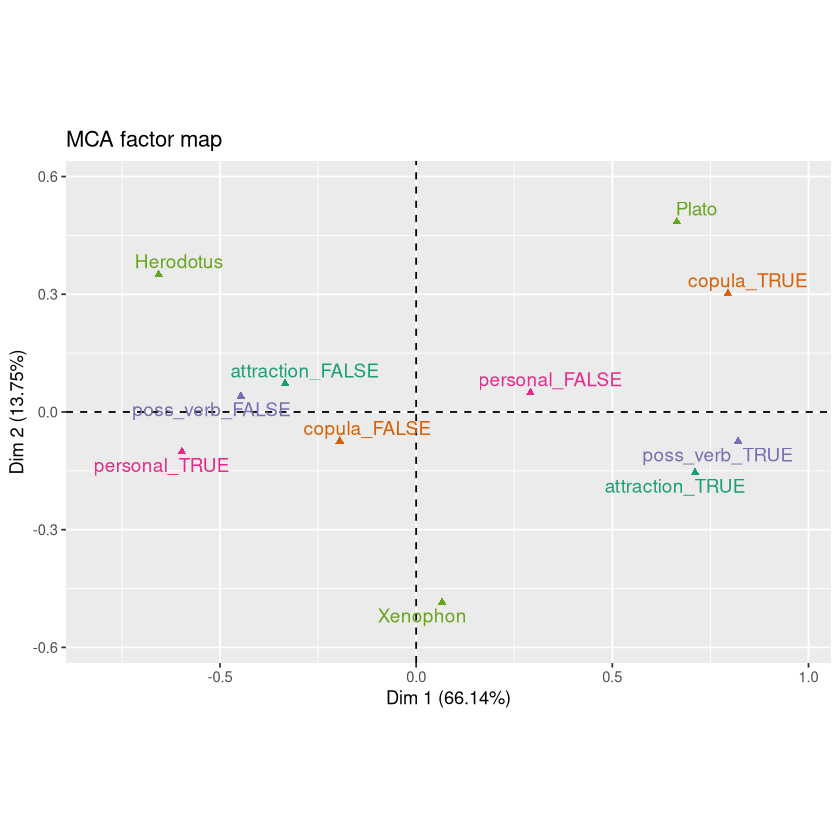

In [297]:
require("factoextra")
fviz_screeplot(mca, addlabels = TRUE, ylim = c(0, 80), barfill="#1B9E77", barcolor="#1B9E77", main="Eigenvalues") + theme_get()
p <- plot(mca, invisible = "ind", graph.type =  "ggplot",
          col.var=c('#1B9E77', '#1B9E77',
                    '#D95F02', '#D95F02',
                    '#7570B3', '#7570B3',
                    '#E7298A', '#E7298A',
                    '#66A61E', '#66A61E', '#66A61E')) + theme_get()
p

,FALSE,TRUE,Sum
Herodotus,33,3,36
Plato,16,14,30
Xenophon,34,22,56
Sum,83,39,122


                    X^2 df   P(> X^2)
Likelihood Ratio 15.747  2 0.00038066
Pearson          13.606  2 0.00111065

Phi-Coefficient   : NA 
Contingency Coeff.: 0.317 
Cramer's V        : 0.334 

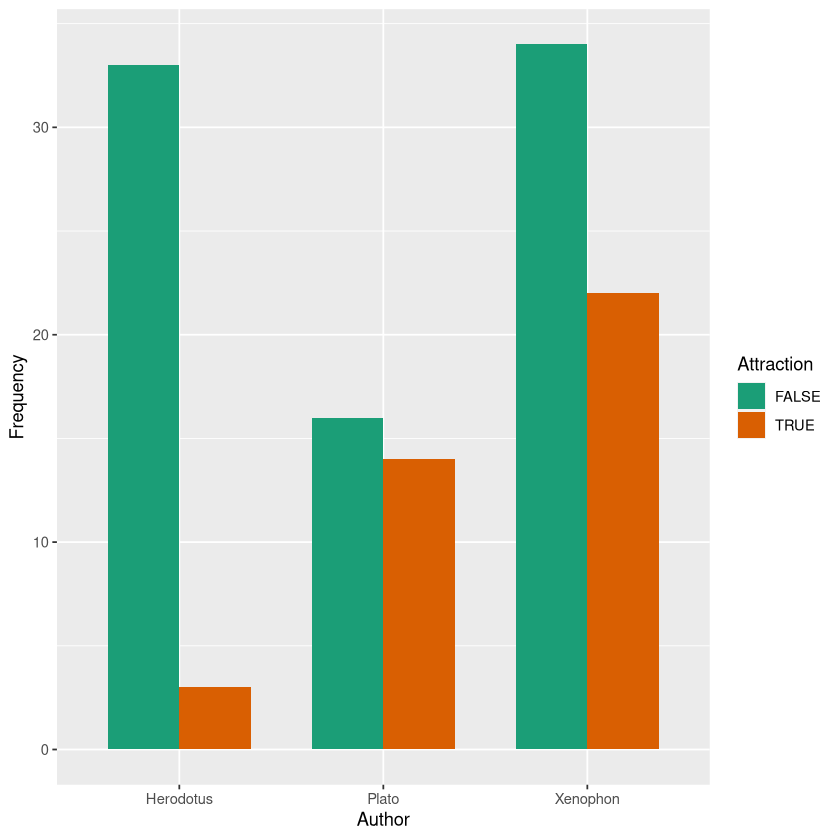

In [216]:
addmargins(table(author, attraction))
assocstats(table(author, attraction))
p <- ggplot(data=group_by(data,author), aes(x=factor(author), fill=attraction)) +
    geom_bar(stat="count", position=position_dodge(), width = .7) + 
    labs(x = "Author", y="Frequency", fill="Attraction") +
    theme_get() + scale_fill_brewer(palette="Dark2")
p

,FALSE,TRUE,Sum
FALSE,68,11,79
TRUE,15,28,43
Sum,83,39,122


                    X^2 df   P(> X^2)
Likelihood Ratio 33.512  1 7.0843e-09
Pearson          33.552  1 6.9378e-09

Phi-Coefficient   : 0.524 
Contingency Coeff.: 0.464 
Cramer's V        : 0.524 

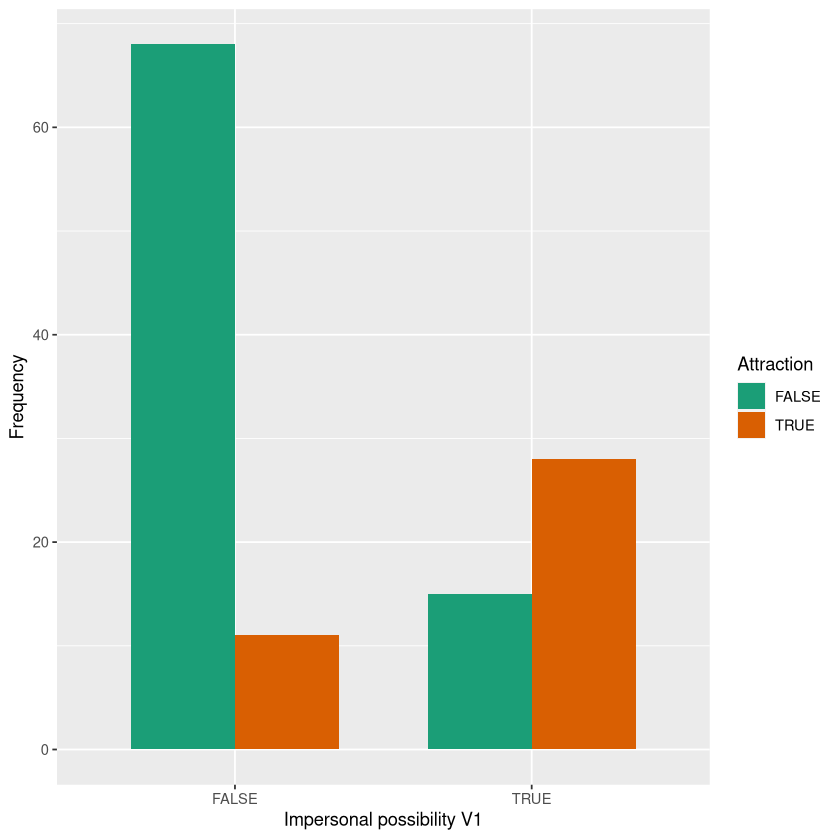

In [185]:
addmargins(table(poss_verb, attraction))
assocstats(table(poss_verb, attraction))
p <- ggplot(data=group_by(data,poss_verb), aes(x=factor(poss_verb), fill=attraction)) +
    geom_bar(stat="count", position=position_dodge(), width = .7) + 
    labs(x = "Impersonal possibility V1", y="Frequency", fill="Attraction") +
    theme_get() + scale_fill_brewer(palette="Dark2")
p